<a href="https://colab.research.google.com/github/ArovaSyams/machine_learning/blob/main/sklearn_grid_search_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Grid Search to find best parameter on SVR model

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
# Divide attribute and label
X = data["YearsExperience"]
y = data["Salary"]

# jika hanya terdapat 1 atribut pada dataset kita perlu mengubah bentuknya agar bisa dipakai pada pelatihan model.

# change atribut form
X = np.array(X)
X = X.reshape(-1, 1)

In [11]:
# build model with C parameter, gamma, and kernel
model = SVR()
parameters = {
    "kernel": ["rbf"],
    "C": [1000, 10000, 100000],
    "gamma": [0.5, 0.05, 0.005]
}
grid_search = GridSearchCV(model, parameters)

# train model with fit function
grid_search.fit(X, y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [12]:
# display the best params for model
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [26]:
# make new model with best params from grid_search
new_model = SVR(C=100000, gamma=0.005, kernel='rbf')
new_model.fit(X, y)

SVR(C=100000, gamma=0.005, kernel='linear')

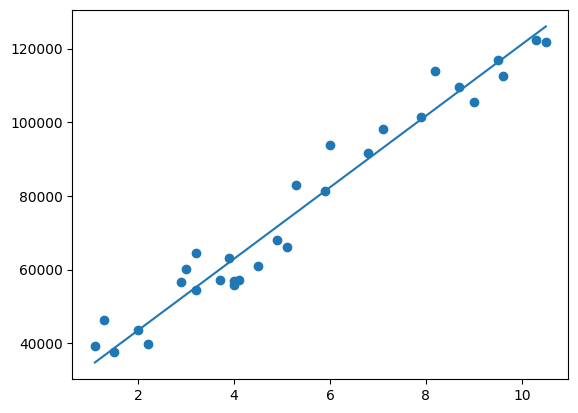

In [28]:
# make plot
plt.scatter(X, y)
plt.plot(X, new_model.predict(X))